# Capstone project: Predicting heart disease

* [INTRODUCTION](#0)
* [IMPORTING MODULES, LOADING DATA & DATA REVIEW](#1)
* [PREPROCESSING](#2)
* [EXPLORATORY DATA ANALYSIS (EDA)](#3)    
* [SCALING, CATEGORICAL VARIABLES, SPLITTING](#4)
* [MODELS](#5)
* [CONCLUSION](#6)

## 1.1 Information About the Project
Cardiovascular disease, including diseases such as coronary artery disease and stroke, are the leading cause of mortality worldwide. The global burden of heart disease has also increased in recent years, from around 12.4 million deaths in 1990 to 19.8 million deaths in 2022 reflecting both population growth as well as aging. The prevalance of cardiovascular disease varies considerably by country, with deomgraphic factors such as age, sex and ethnicity as well as health-related and behavioural factors such as diet, cholesterol, diabetes, air pollution, obesity, tobacco use, kidney disease, physical inactivity, harmful use of alcohol, and stress. 

**Objective:**  
Being able to detect a patient's risk of heart disease from these factors could be very useful, to support earlier clinical as well as behavioural interventions. This project aims to build, finetune and deploy a binary classification predictive model that can accurately predict whether or not a patient has had a heart attack given information about that patient's demongraphic, health and behavioural characteristics.


**Scope:**  
The project will cover exploratory data analysis of this large dataset, and feature engineering to maximise the utility and efficiency of the available data for predicting heart attacks. Different types of binary classification models will be tested, compared and optimised with the best perfomring model to be taken through for deployment.

## 1.2 Description of the Dataset
The dataset is a large dataset including demographic, health and behavioural characteristics for over 100,000 patients from the USA, as well as information on whether or not they have suffered a heart attack.

- **Source:** The dataset is an open dataset from [Kaggle](https://www.kaggle.com/datasets/tarekmuhammed/patients-data-for-medical-field/data)
- **Size:** Total number of records: 237630, total number of columns: 35
- **Type:** Tabular

## 1.3 Description of the Columns

**Target Variable:** 
- HadHeartAttack: Indicator of whether the patient had a heart attack. This is a binary label (0 = no heart attack, 1 = had heart attack). We are trying to predict from a patients demongraphic, health and behavioural characteristics whether or not they will have had a heart attack.

**Feature Variables:** A brief description of the important columns, including their data types.
- PatientID: Unique identifier for each patient.
- State: Geographic state of residence.
- Sex: Gender of the patient.
- GeneralHealth: Self-reported health status.
- AgeCategory: Categorized age group of the patient.
- HeightInMeters: Height of the patient (in meters).
- WeightInKilograms: Weight of the patient (in kilograms).
- BMI: Body Mass Index, calculated from height and weight.
- HadAngina: Indicator of whether the patient experienced angina.
- HadStroke: Indicator of whether the patient had a stroke.
- HadAsthma: Indicator of whether the patient has asthma.
- HadSkinCancer: Indicator of whether the patient had skin cancer.
- HadCOPD: Indicator of whether the patient had chronic obstructive pulmonary disease (COPD).
- HadDepressiveDisorder: Indicator of whether the patient was diagnosed with a depressive disorder.
- HadKidneyDisease: Indicator of whether the patient had kidney disease.
- HadArthritis: Indicator of whether the patient had arthritis.
- HadDiabetes: Indicator of whether the patient had diabetes.
- DeafOrHardOfHearing: Indicator of hearing impairment.
- BlindOrVisionDifficulty: Indicator of vision impairment.
- DifficultyConcentrating: Indicator of concentration difficulties.
- DifficultyWalking: Indicator of walking difficulties.
- DifficultyDressingBathing: Indicator of difficulties in dressing or bathing.
- DifficultyErrands: Indicator of difficulties in running errands.
- SmokerStatus: Status of whether the patient is a smoker.
- ECigaretteUsage: Indicator of e-cigarette usage.
- ChestScan: Indicator of whether the patient had a chest scan.
- RaceEthnicityCategory: Race or ethnicity of the patient.
- AlcoholDrinkers: Status of whether the patient consumes alcohol.
- HIVTesting: Status of whether the patient was tested for HIV.
- FluVaxLast12: Status of whether the patient received a flu vaccine in the last 12 months.
- PneumoVaxEver: Status of whether the patient ever received a pneumococcal vaccine.
- TetanusLast10Tdap: Status of whether the patient received a tetanus vaccine in the last 10 years.
- HighRiskLastYear: Indicator of whether the patient was at high risk in the last year.
- CovidPos: Status of whether the patient tested positive for COVID-19.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">1. Importing Modules, Load Data & Data Review</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [2]:
# Load common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_excel(r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\Capstone project\Heart Disease\data\Patients Data ( Used for Heart Disease Prediction ).xlsx")

In [4]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


In [5]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [6]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">2. Preprocessing</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 2.1 Check for missing values in the data

In [7]:
df.isna().sum()
# No missing values in the data

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

## 2.2 Check for duplicate values

In [8]:
df.duplicated().sum()

0

There are no missing values or duplicate values in the dataset

## 2.3 Outlier analysis

Text(0.5, 0.98, 'Boxplots for Height, Weight, and BMI')

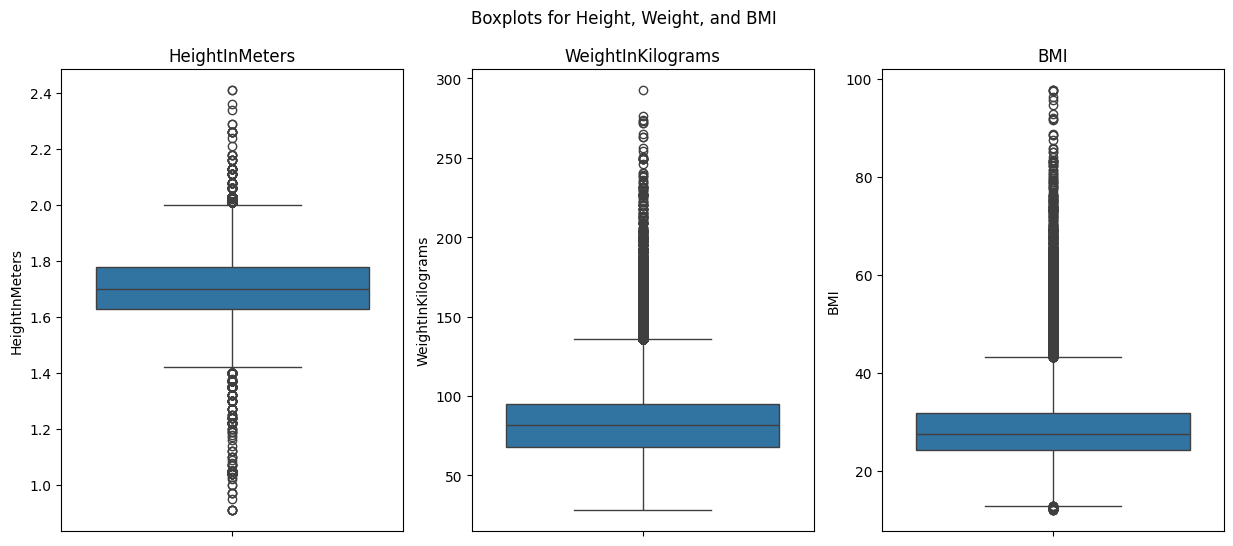

In [9]:
# Plot boxplots of the three continous numeric variables to look for obvious outliers

# create subplots
fig, axes = plt.subplots(1, 3,figsize = (15,6))

# List of columns to plot
columns = ['HeightInMeters', 'WeightInKilograms', 'BMI']

# Plot each column as a separate boxplot
for i, col in enumerate(columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(col)
  

# Add an overarching title
plt.suptitle("Boxplots for Height, Weight, and BMI")

Seems like there are some individuals with extremely high weight and BMI, these could be real though. Prevalance of of class 3 obesity (BMI>40) ~9.2% of US adults (CDC 2018 data), of these obese individuals some smaller subset (<0.1%) have an extreme BMI >80. Out of population of 237630, we'd therefore expect roughly 237630 * 0.092 * 0.001 = 22 indivudals.

In [10]:
# Number of inidividuals we might expect to have extreme obesity (BMI > 80)
print(237630 * 0.092 * 0.001)

# Number of people in our data who have extreme obesity (BMI > 80)
len(df[df['BMI'] > 80])

21.86196


36

These numbers are quite similar to one another. In addition, our dataset isn't a random subset of the population: no individuals under 18 are in the data yet ~24% of people in the US are under age 19 see [Census 2023](https://www.census.gov/data/tables/2023/demo/age-and-sex/2023-age-sex-composition.html). Children under 19 are less likely to suffer from extreme obesity than older individuals.

In [11]:
# Distriubtion of age categories by percentage. No children under the age of 18 are in the dataset.
((df['AgeCategory'].value_counts())/237630)*100


AgeCategory
Age 65 to 69       11.592392
Age 60 to 64       10.808820
Age 70 to 74       10.497833
Age 55 to 59        9.014855
Age 50 to 54        8.060430
Age 75 to 79        7.439717
Age 80 or older     7.382906
Age 40 to 44        6.829104
Age 45 to 49        6.773135
Age 35 to 39        6.304760
Age 30 to 34        5.397046
Age 18 to 24        5.376846
Age 25 to 29        4.522156
Name: count, dtype: float64

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [12]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## Univariate distributions of categorical variables

Fix the order othe categorical variables

In [13]:
df['AgeCategory'].value_counts()

AgeCategory
Age 65 to 69       27547
Age 60 to 64       25685
Age 70 to 74       24946
Age 55 to 59       21422
Age 50 to 54       19154
Age 75 to 79       17679
Age 80 or older    17544
Age 40 to 44       16228
Age 45 to 49       16095
Age 35 to 39       14982
Age 30 to 34       12825
Age 18 to 24       12777
Age 25 to 29       10746
Name: count, dtype: int64

In [14]:
# Correct order for AgeCategory
age_order = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
    'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
    'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79',
    'Age 80 or older'
]

# Convert AgeCategory to a categorical type with the specified order
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True)

In [15]:
# Correct order for General Health
health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

df['GeneralHealth'] = pd.Categorical(df['GeneralHealth'], categories = health_order, ordered = True)

In [16]:
#Change order for diabetes, ecigs, smoker
diabetes_order = [
    'No',
    'No, pre-diabetes or borderline diabetes', 
    'Yes, but only during pregnancy (female)', 
    'Yes'
]

ecig_order = [
    'Never used e-cigarettes in my entire life', 
    'Not at all (right now)', 
    'Use them some days', 
    'Use them every day'
]

smoker_order = [
    'Never smoked', 
    'Former smoker', 
    'Current smoker - now smokes some days', 
    'Current smoker - now smokes every day'
]


# Convert columns to categorical with the specified order
df['HadDiabetes'] = pd.Categorical(df['HadDiabetes'], categories=diabetes_order, ordered=True)
df['ECigaretteUsage'] = pd.Categorical(df['ECigaretteUsage'], categories=ecig_order, ordered=True)
df['SmokerStatus'] = pd.Categorical(df['SmokerStatus'], categories=smoker_order, ordered=True)


In [17]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

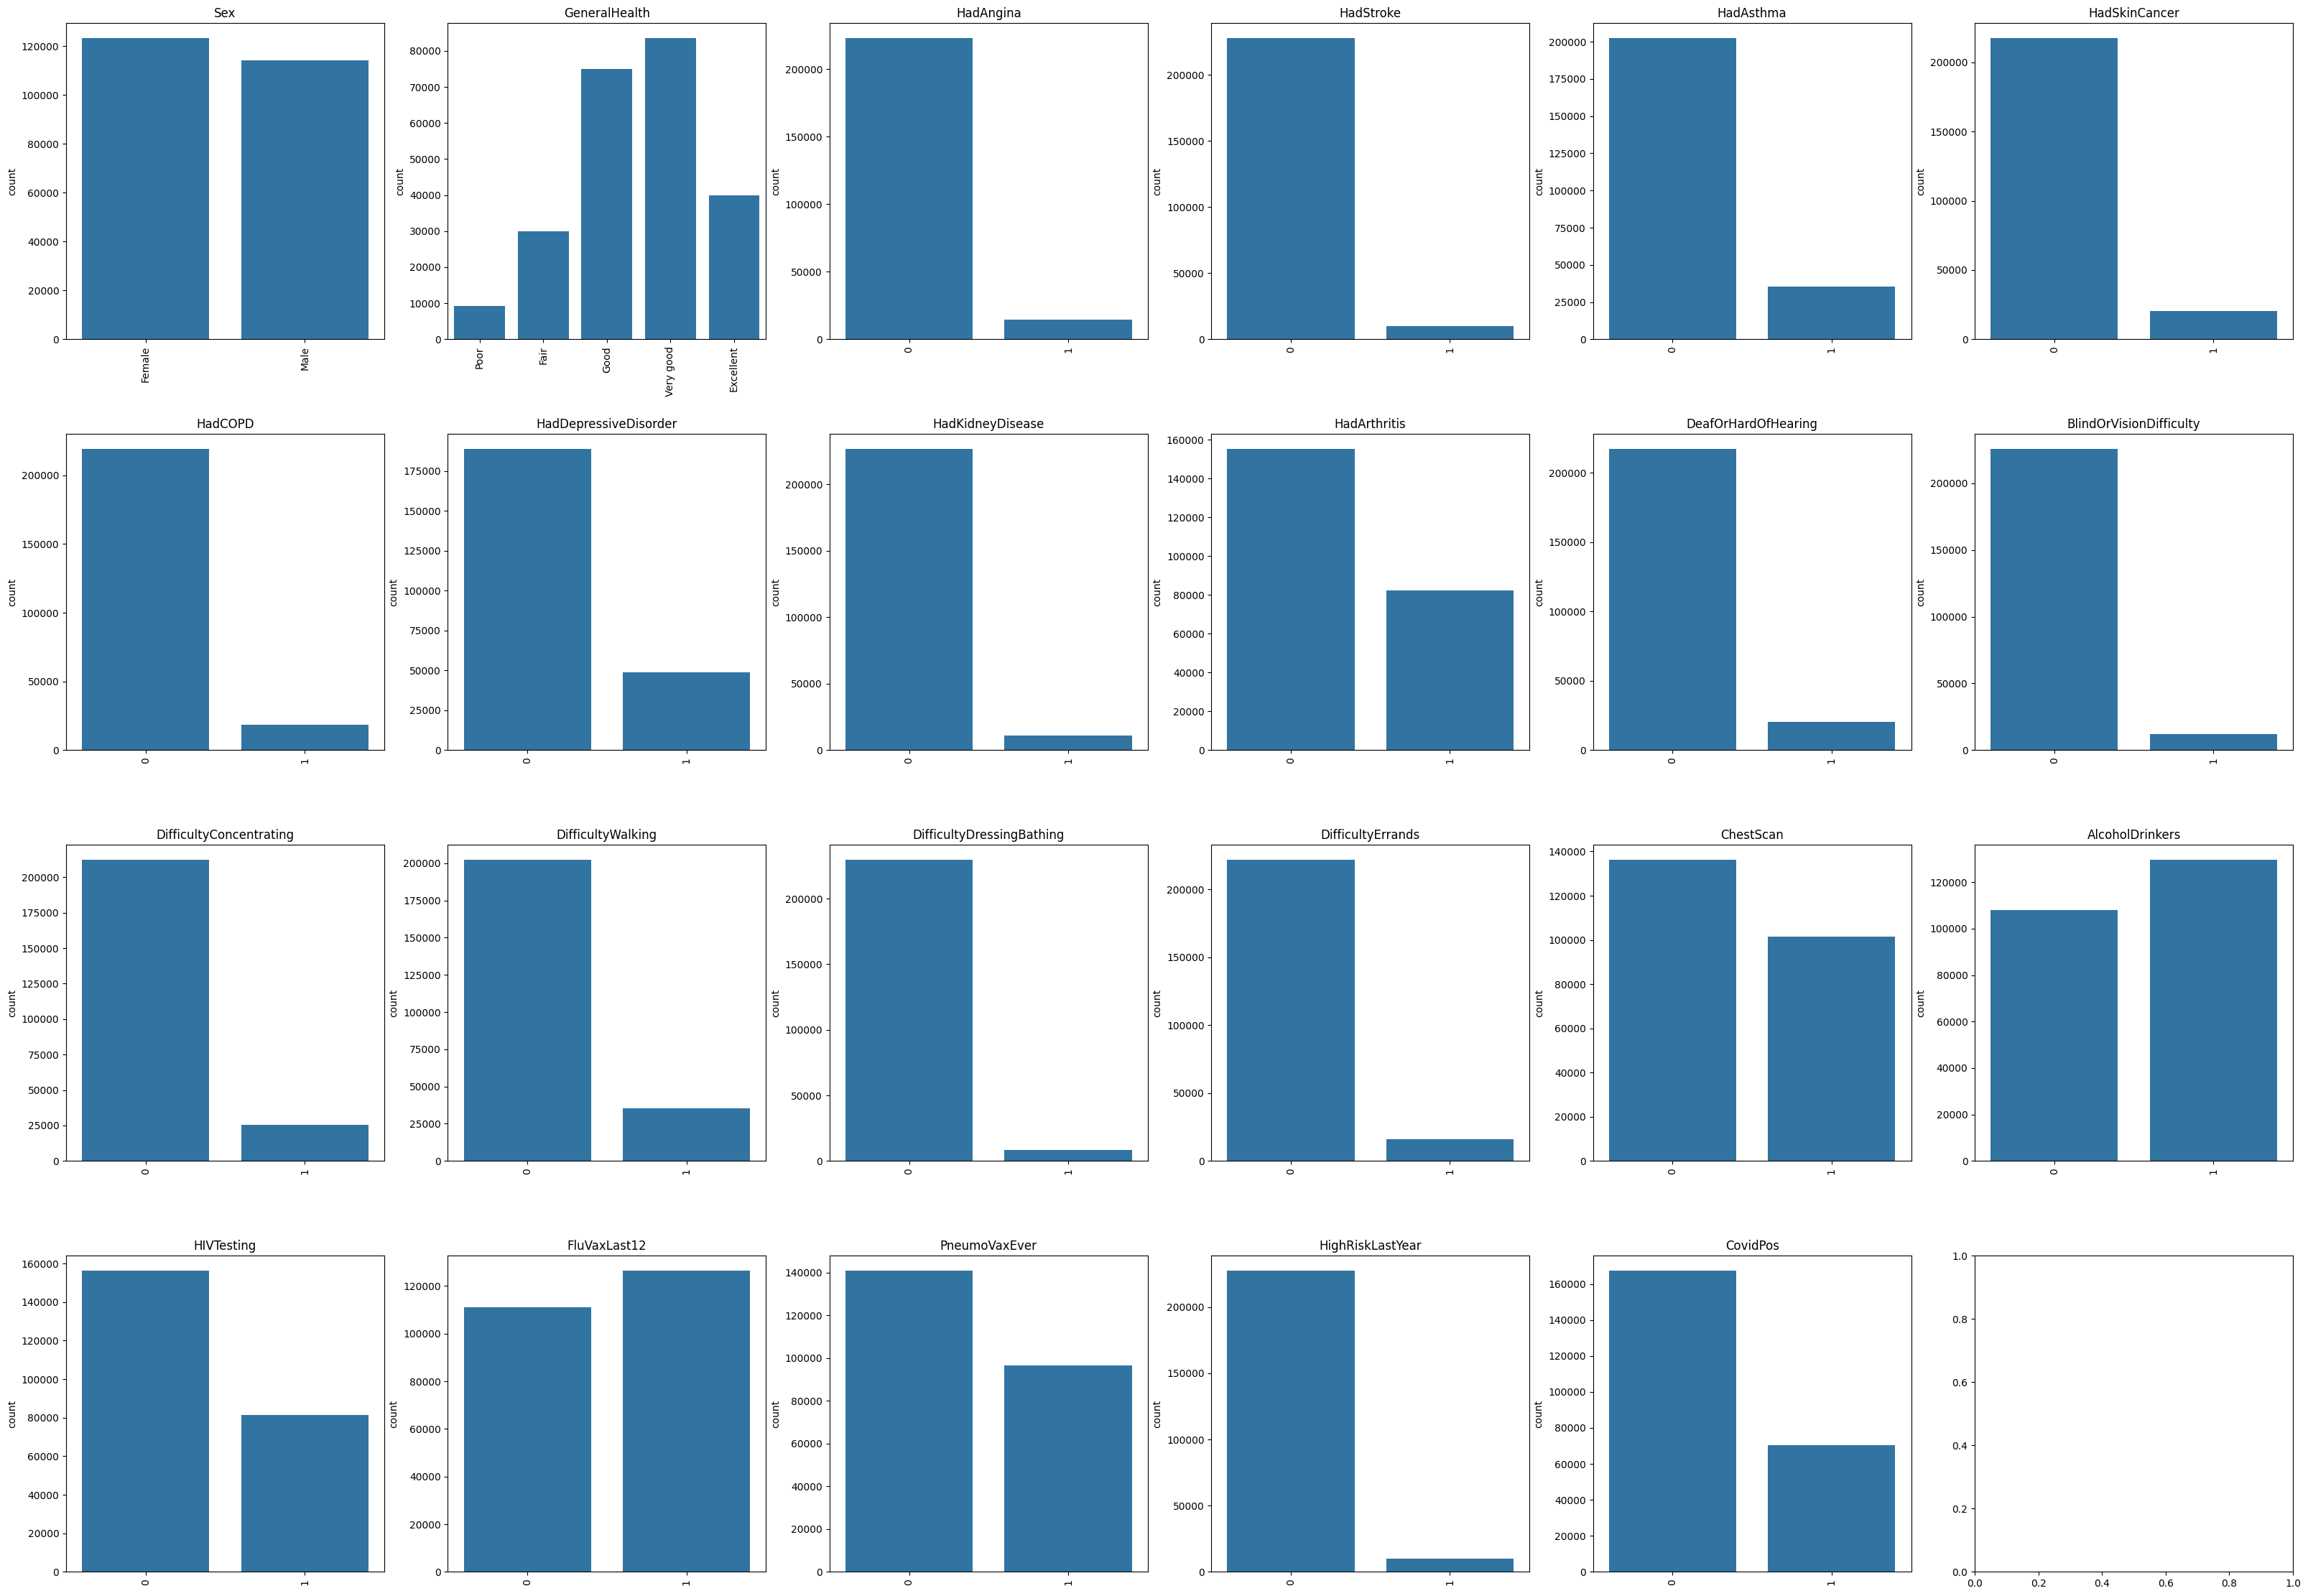

In [18]:
cat_vars1 = ['Sex','GeneralHealth','HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 
       'ChestScan',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',  'HighRiskLastYear', 'CovidPos']


fig, axes = plt.subplots(4,6, figsize = (40, 28))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars1):
    row, col_idx = divmod(i, 6)
    sns.countplot(x = col, data = df, ax= axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].tick_params(axis='x', rotation=90)
    axes[row, col_idx].set_xlabel("") 

plt.subplots_adjust(hspace=0.3)
plt.show()


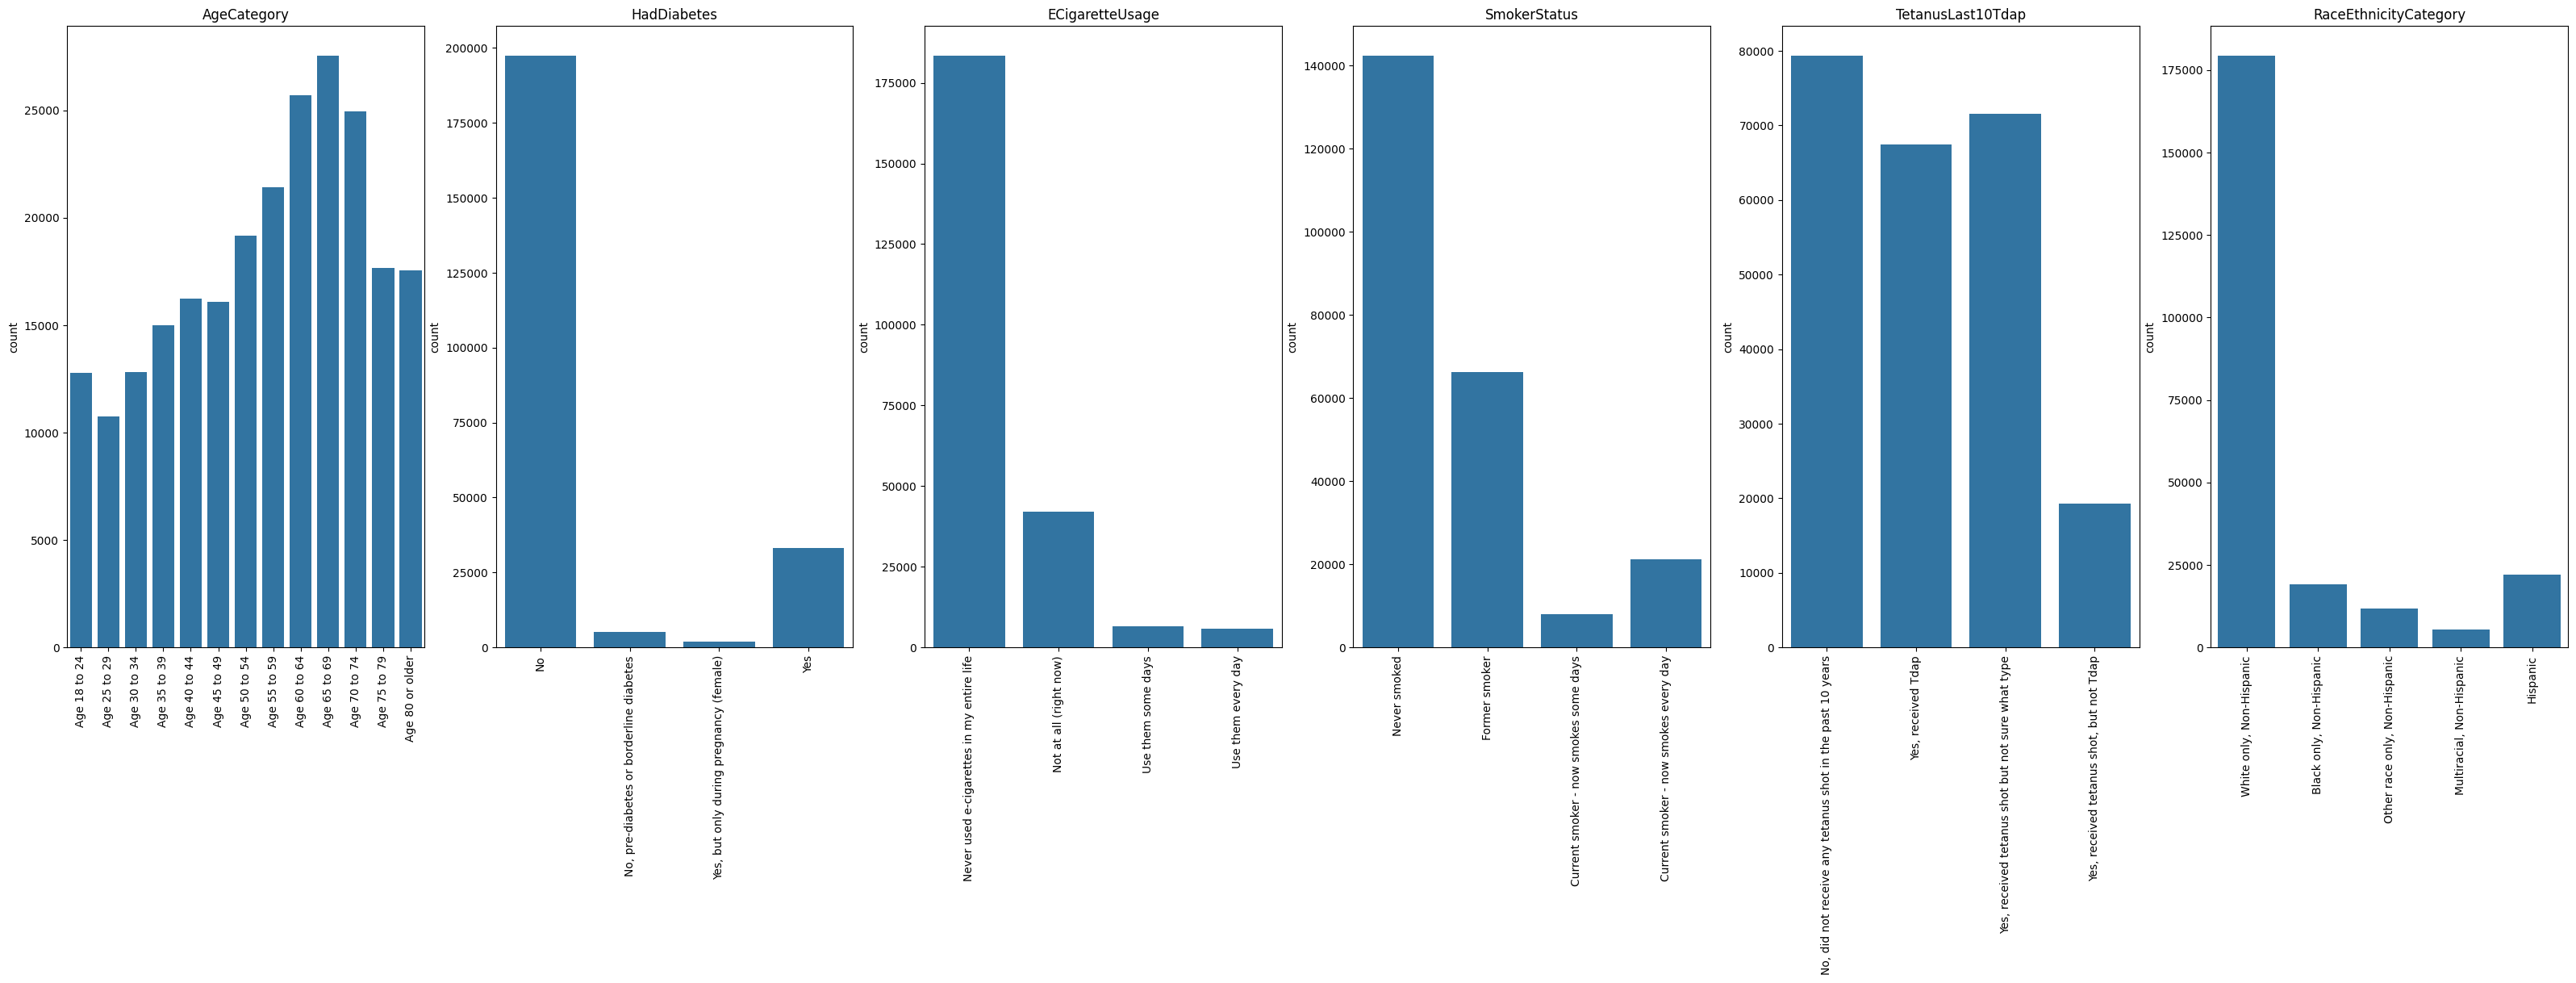

In [19]:
cat_vars2 = ['AgeCategory','HadDiabetes', 'ECigaretteUsage', 'SmokerStatus','TetanusLast10Tdap','RaceEthnicityCategory']

fig, axes = plt.subplots(1,6, figsize = (40, 10))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars2):
    sns.countplot(x = col, data = df, ax= axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel("") 

plt.show()

## Associations with the target variable

### Demographic characteristics

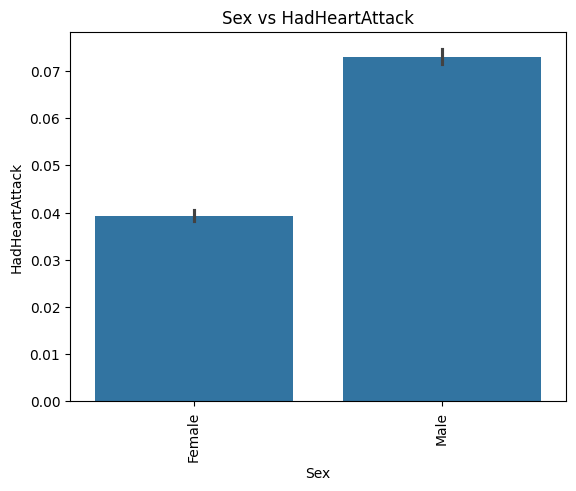

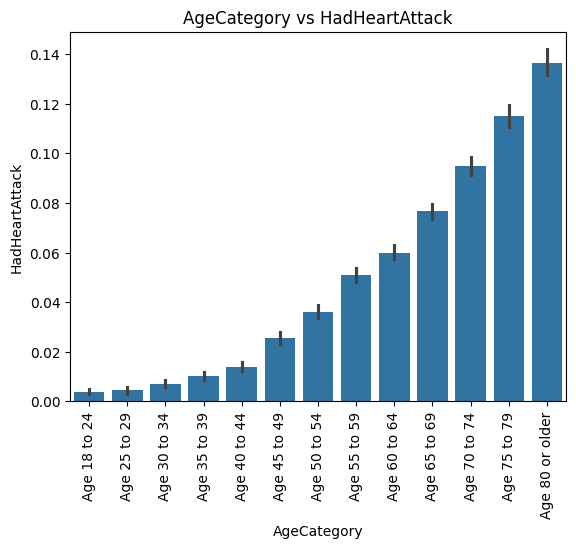

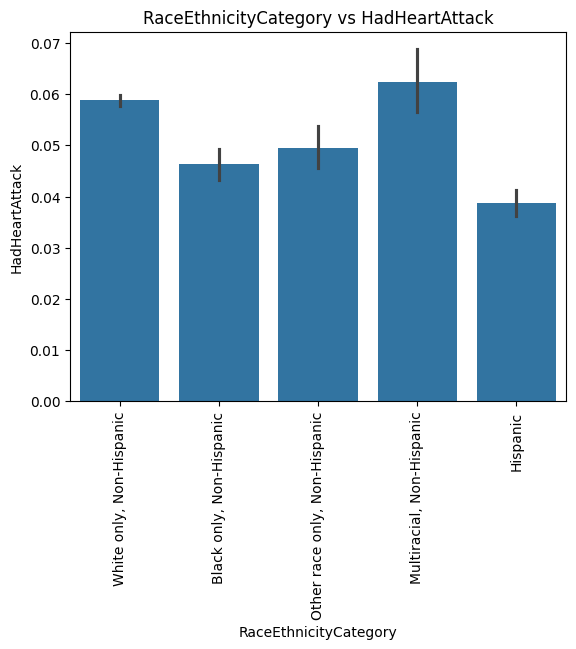

In [20]:
for col in ['Sex', 'AgeCategory', 'RaceEthnicityCategory']:
    sns.barplot(x=col, y='HadHeartAttack', data=df)
    plt.xticks(rotation = 90)
    plt.title(f'{col} vs HadHeartAttack')
    plt.show()

Age is a strong risk factor for heart attacks, and males are much more likely than females to have had a heartattack. Not much differences by race or ethnicity though

### Behavioural characteristics

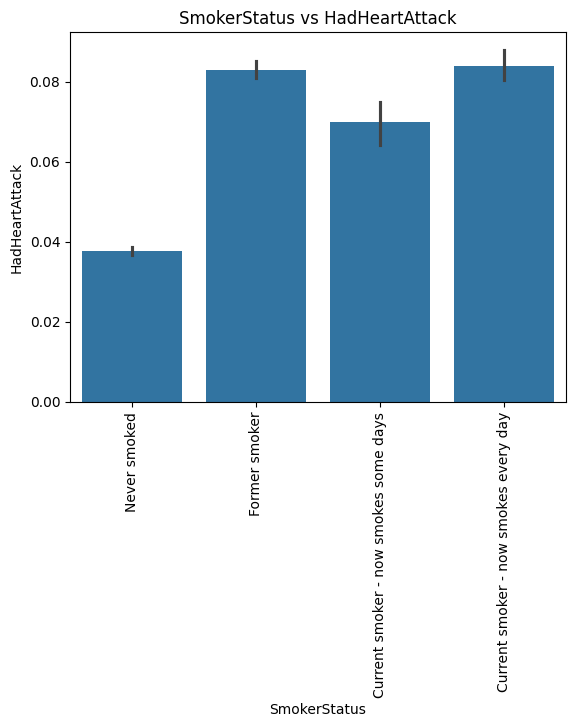

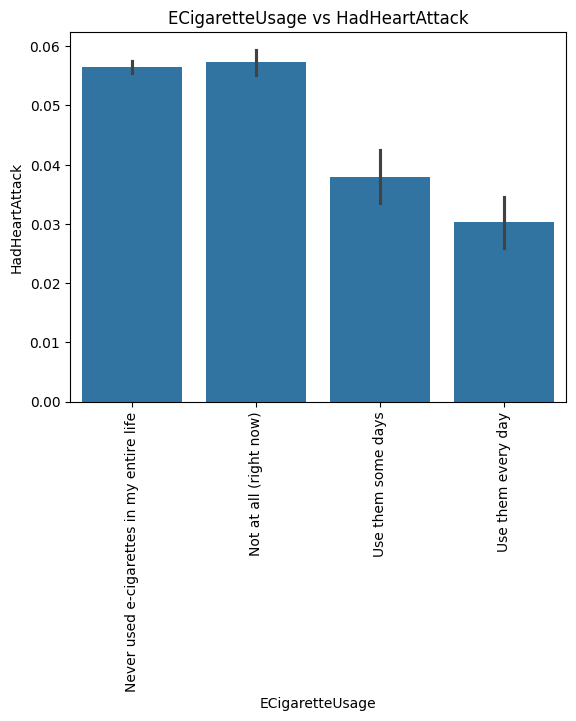

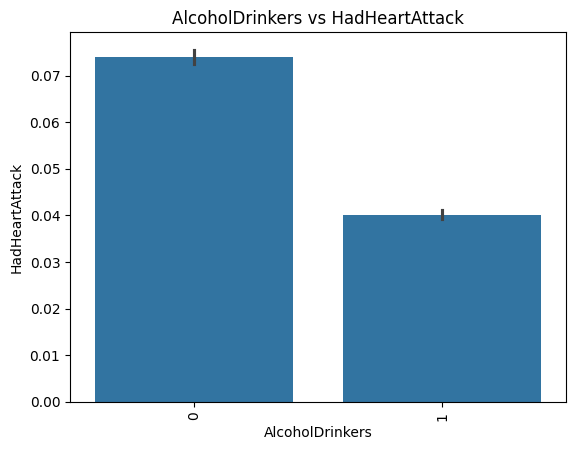

In [21]:
for col in ['SmokerStatus', 'ECigaretteUsage','AlcoholDrinkers']:
    sns.barplot(x = col, y = 'HadHeartAttack', data = df)
    plt.xticks(rotation = 90)
    plt.title(f'{col} vs HadHeartAttack')
    plt.show()

Smoking is a risk, but it doesn't seem to matter too much whether the individual formerly smoked or is a current smoker. Ecigarette usage looks protective of heart attacks, but this is likely because users of Ecigarettes are also younger. Surprisingly, alcohol usage also seems to be protective (this could because of age again - see below)

CHECK AGE WITH ECIG USE AND ALCOHOL USE HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Health characteristics and their association with having a heart attack

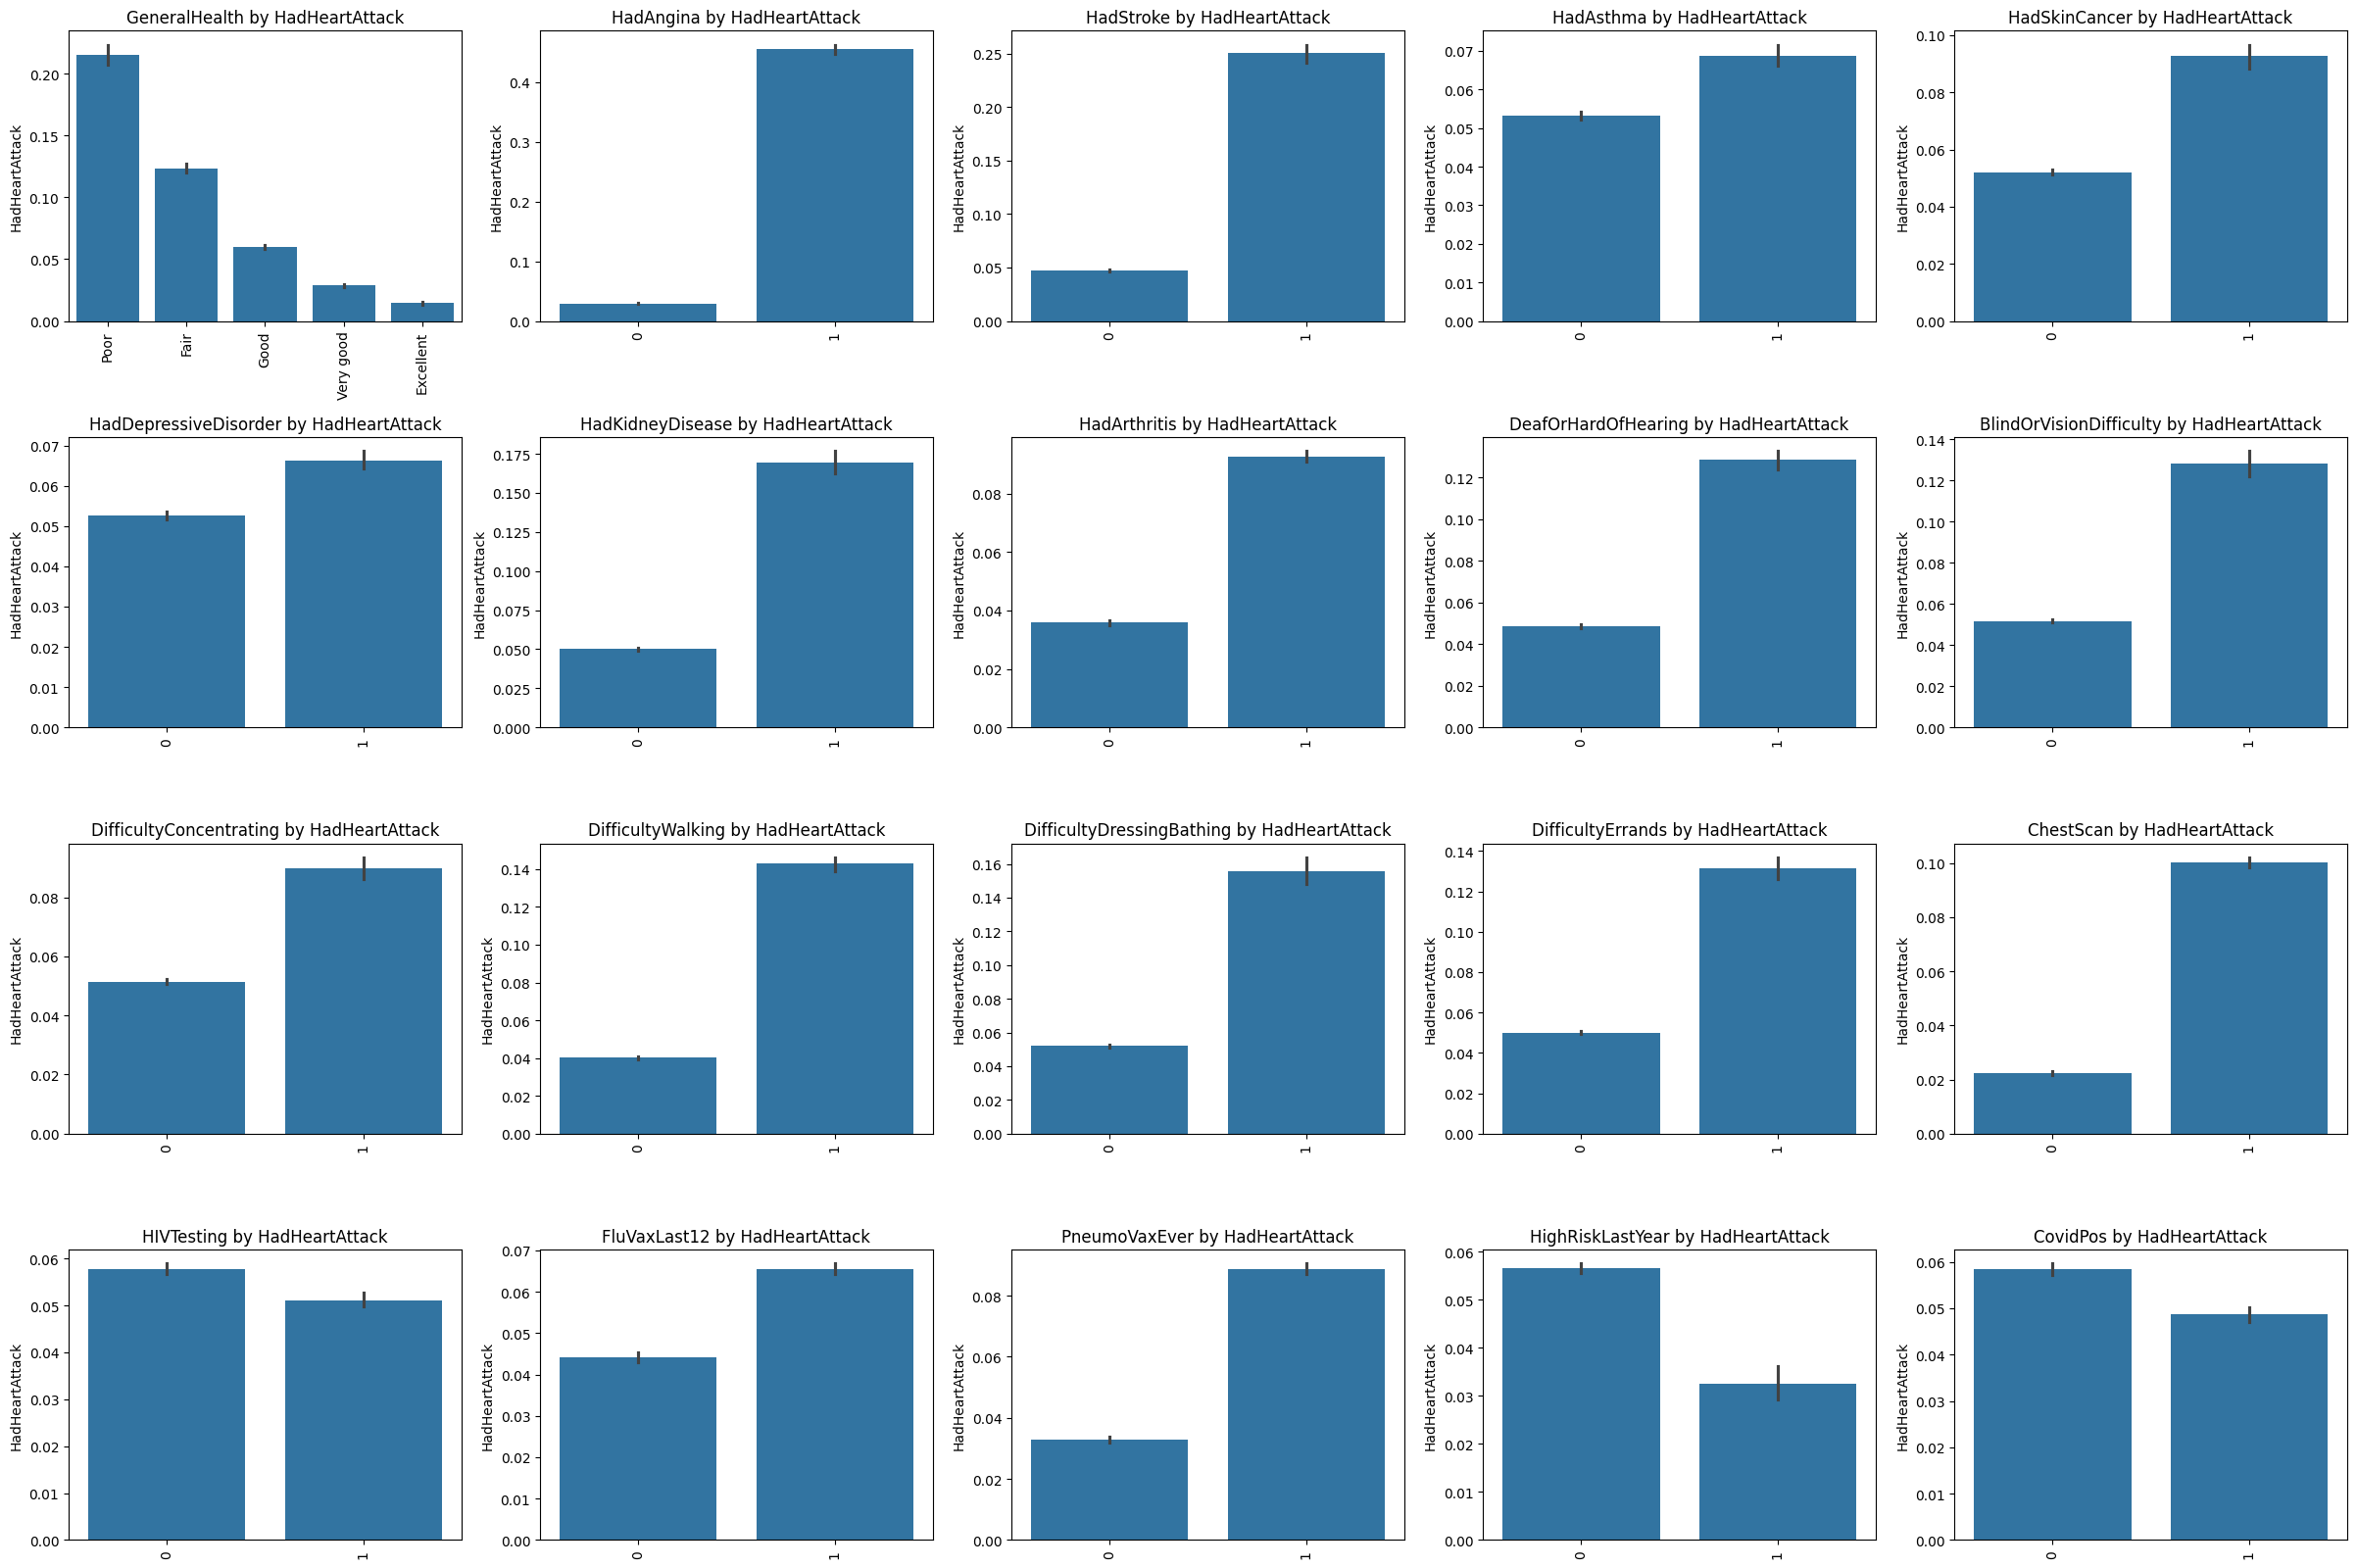

In [22]:
cat_vars3 = ['GeneralHealth','HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 
       'ChestScan',
        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',  'HighRiskLastYear', 'CovidPos']


fig, axes = plt.subplots(4,5, figsize = (30, 20))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars3):
    row, col_idx = divmod(i, 5)
    sns.barplot(x = col, y= 'HadHeartAttack', data = df, ax= axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by HadHeartAttack')
    axes[row, col_idx].tick_params(axis='x', rotation=90)
    axes[row, col_idx].set_xlabel("") 

plt.subplots_adjust(hspace=0.4)
plt.show()

There appear to be clear differences in risk of heart attack depending on many of these health characteristics. Many of these are also likely associated with increasing age, howver, so it's difficult to distinguish between these two effects in these plots. Below, I plot the same but grouped now by age category, to show where the differences are being driven only by age, or where there are additional effects

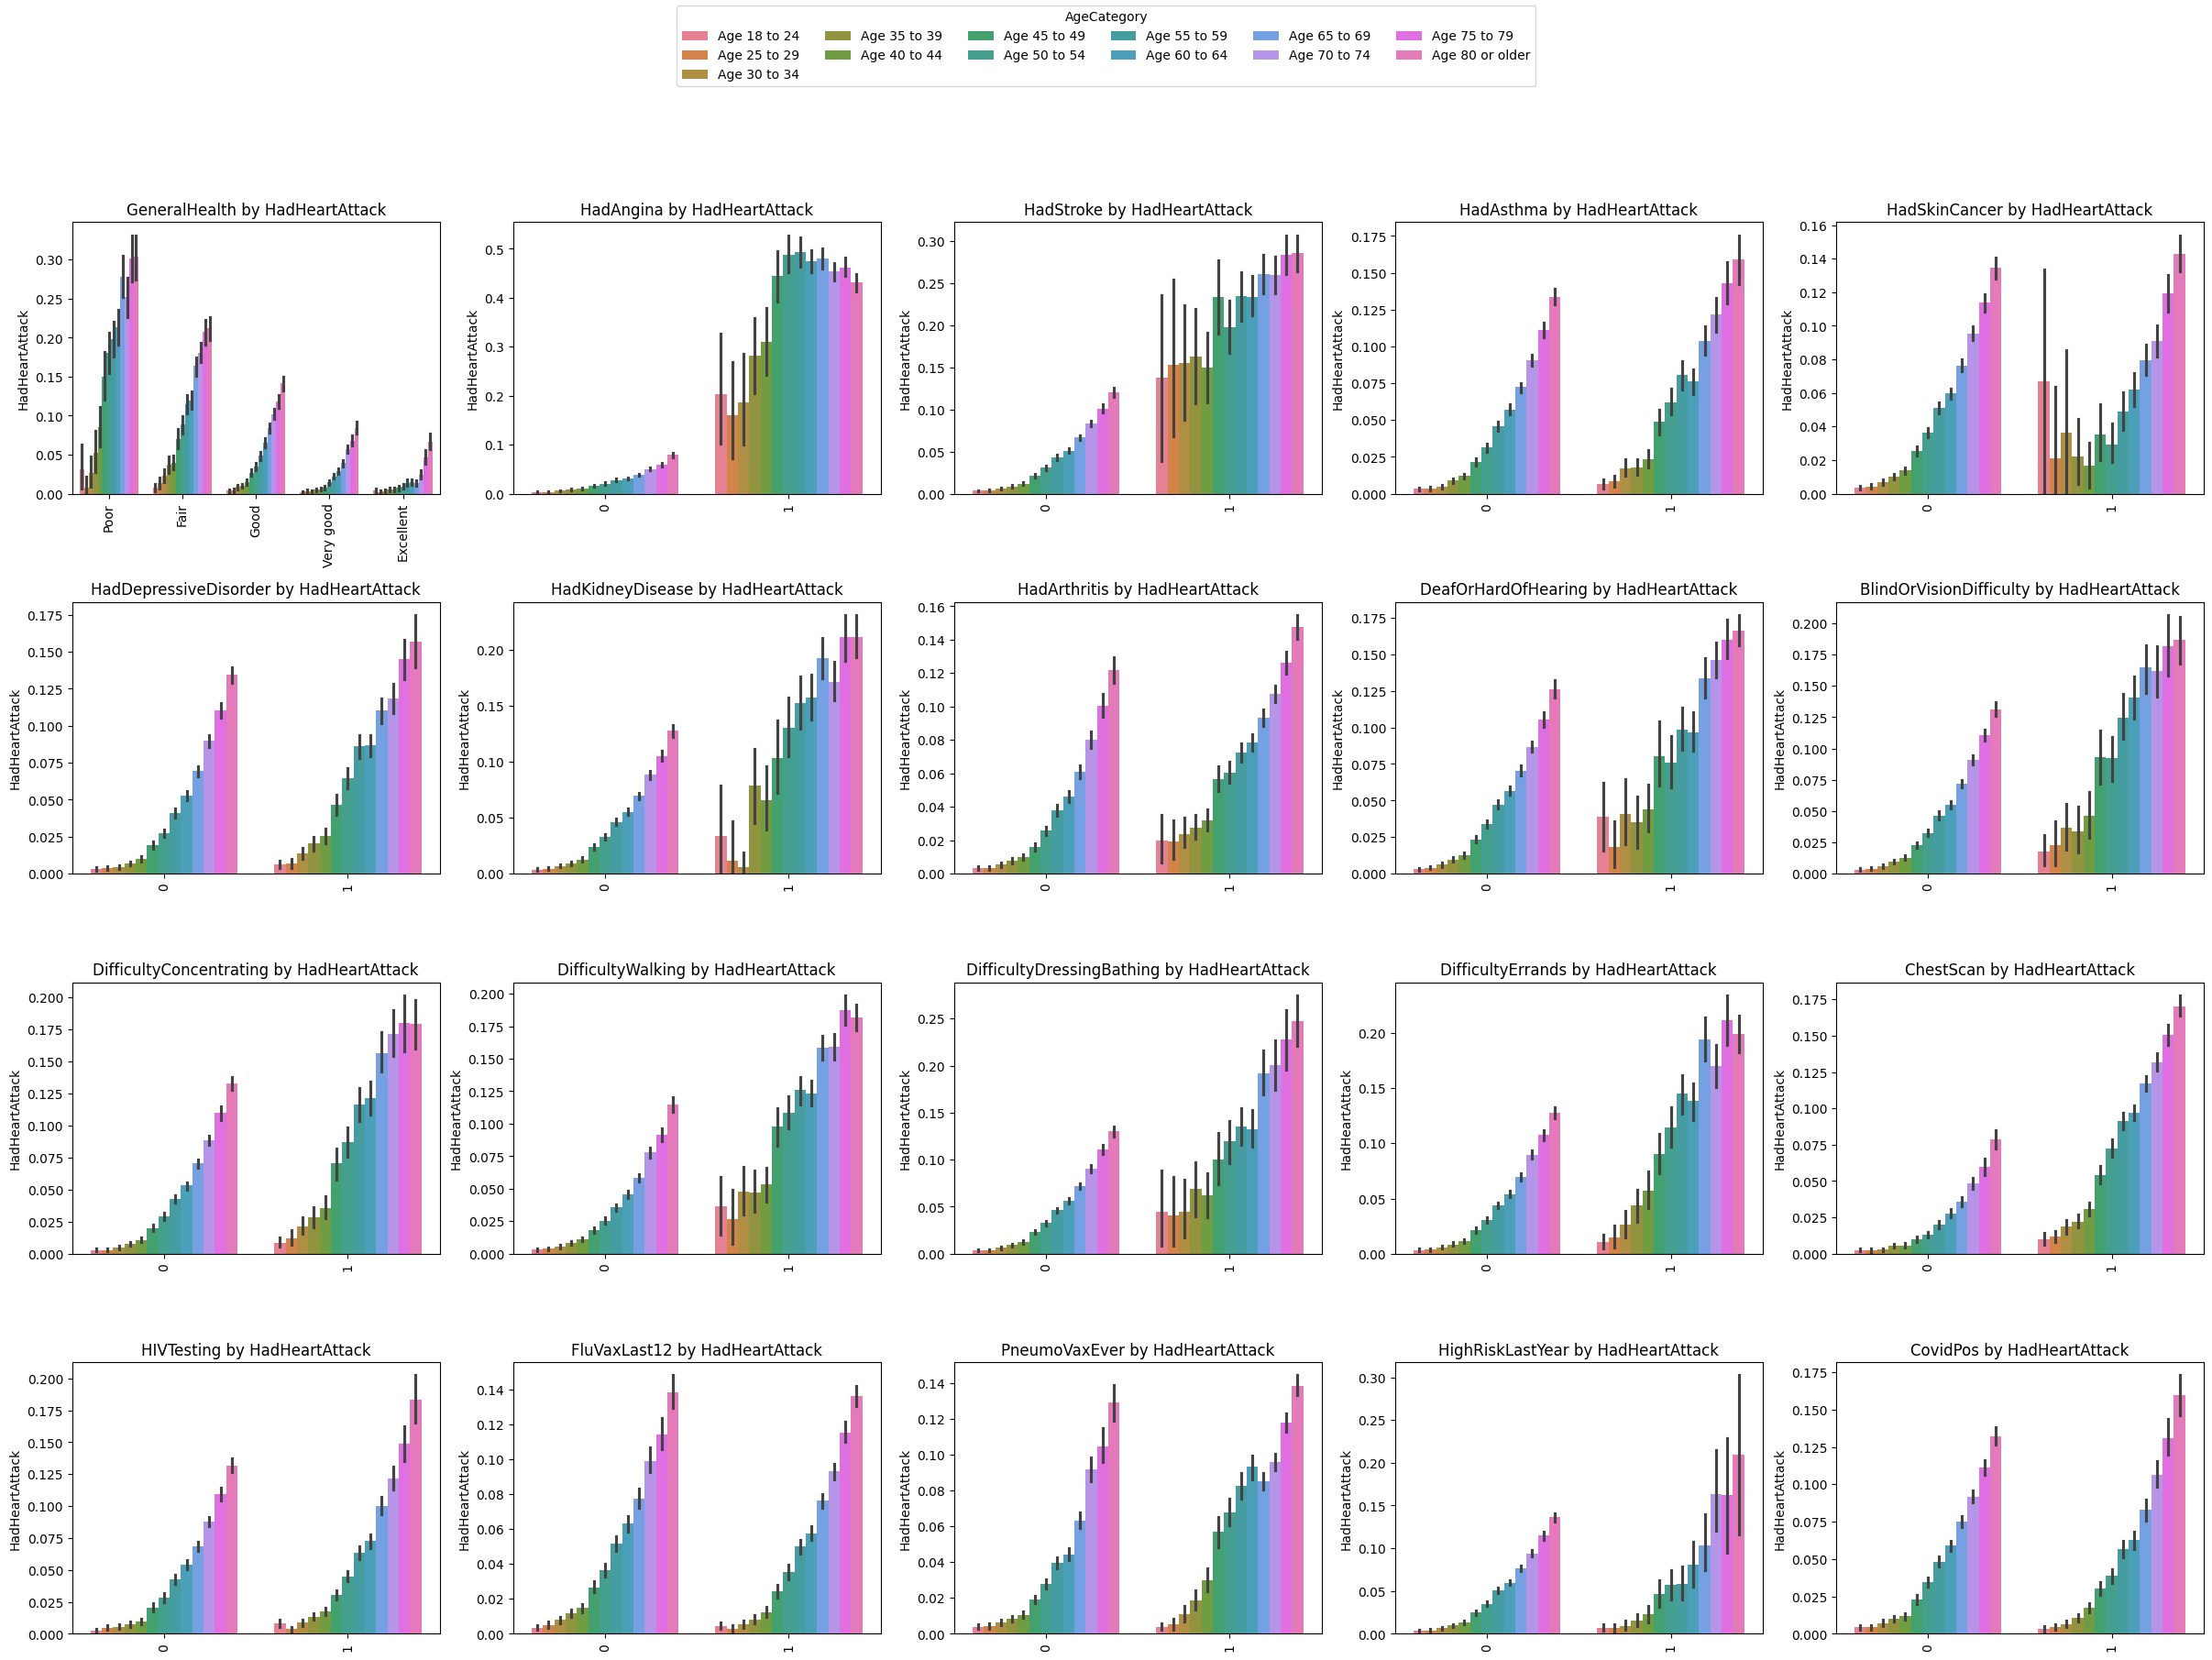

In [23]:
fig, axes = plt.subplots(4,5, figsize = (30, 20))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars3):
    row, col_idx = divmod(i, 5)
    sns.barplot(x = col, y= 'HadHeartAttack', hue= 'AgeCategory', data = df, ax= axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by HadHeartAttack')
    axes[row, col_idx].tick_params(axis='x', rotation=90)
    axes[row, col_idx].set_xlabel("") 
    axes[row, col_idx].get_legend().remove()

# Add a single legend to the figure
handles, labels = axes[0, 0].get_legend_handles_labels()  # Get legend from the first subplot
fig.legend(handles, labels, title='AgeCategory', loc='upper center', ncol=6)

plt.subplots_adjust(hspace=0.4)
plt.show()


Grouping by age, we can see General Health is still a strong predictor of whether an individual has had a heart attack or not. Stroke and most especially angina are also associated with higher risk, other conditions show weaker effects

### Continuous variables like height, weight, and BMI on heart attack likelihood

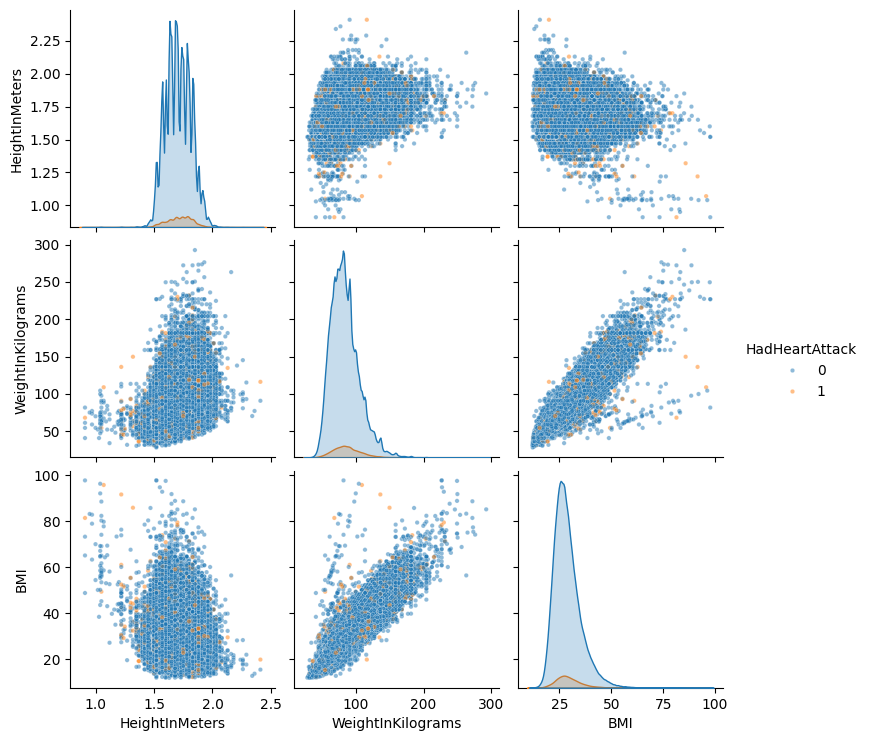

In [24]:
sns.pairplot(df, vars=['HeightInMeters', 'WeightInKilograms', 'BMI'], hue='HadHeartAttack', plot_kws={'alpha': 0.5, 's':10} )
plt.show()

There doesn't seem to be any obvious patterns here, the distributions of height, weight and BMI appear similar among the HadHeartAttack = 0 and HadHeartAttack = 1 groups

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">4. Scaling, Categorical Variables, and Splitting</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>


## 4.1 Encoding categorical variables

### AgeCategory needs to be encoded 
This is an ordinal feature so ordinal encoding should work well for tree models I want to try, won't work as well with linear models

In [25]:
# Encode AgeCategory. Try ordinal encoding (should work well for tree, mught not work so well for linear models)
df['age'] = df['AgeCategory'].map({'Age 18 to 24': 0,
                                   'Age 25 to 29': 1,
                                   'Age 30 to 34': 2,
                                   'Age 35 to 39': 3,
                                   'Age 40 to 44': 4,
                                   'Age 45 to 49': 5,
                                   'Age 50 to 54': 6,
                                   'Age 55 to 59': 7,
                                   'Age 60 to 64': 8,
                                   'Age 65 to 69': 9,
                                   'Age 70 to 74': 10,
                                   'Age 75 to 79': 11,
                                   'Age 80 or older': 12})

df.drop('AgeCategory', axis = 1, inplace = True)

### Encode smoker status. Try ordinal encoding first (since we assume some ordinaliry in risk) to make model training and testing more efficient


In [26]:
# Ordinal Encoding for SmokerStatus
df['smoker'] = df['SmokerStatus'].map({"Never smoked": 0,
                                       "Former smoker": 1,
                                        "Current smoker - now smokes some days": 2,
                                        "Current smoker - now smokes every day": 3})
df.drop('SmokerStatus', axis = 1, inplace = True)

### Encode sex through binary encoding (no need to one-hot encode as only 2 categories)

In [27]:

df['sex'] = df['Sex'].map({'Female': 0, 'Male': 1})
df.drop('Sex', axis = 1, inplace = True)


### Ordinally encode GeneralHealth feature


In [28]:
df['gen_health'] = df['GeneralHealth'].map({'Excellent': 0,
                                               'Very good': 1,
                                               'Good': 2,
                                               'Fair': 3,
                                               'Poor': 4})

df.drop('GeneralHealth', axis = 1, inplace = True)

### Encode HadDiabetes

In [29]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

In [30]:
df['diabetes_binary'] = df['HadDiabetes'].map({
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes': 1,
    'Yes, but only during pregnancy (female)': 1
})

df.drop('HadDiabetes', axis = 1, inplace = True)

### Encode ECigaretteUsage
Also has some ordinality, encode as such

In [31]:
df['ECigaretteUsage'].value_counts()

ECigaretteUsage
Never used e-cigarettes in my entire life    183446
Not at all (right now)                        41963
Use them some days                             6468
Use them every day                             5753
Name: count, dtype: int64

In [32]:
df['ECigaretteUsage'] = df['ECigaretteUsage'].map({'Never used e-cigarettes in my entire life':0,
                                                   'Not at all (right now)': 1,
                                                   'Use them some days': 2,
                                                   'Use them every day': 3})

In [33]:
df['ECigaretteUsage'].value_counts()

ECigaretteUsage
0    183446
1     41963
2      6468
3      5753
Name: count, dtype: int64

### Tetatnus jab

In [34]:
df['TetanusLast10Tdap'].value_counts()

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    79370
Yes, received tetanus shot but not sure what type            71538
Yes, received Tdap                                           67418
Yes, received tetanus shot, but not Tdap                     19304
Name: count, dtype: int64

In [35]:
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map({'No, did not receive any tetanus shot in the past 10 years': 0,
                                                       'Yes, received tetanus shot but not sure what type': 1,
                                                       'Yes, received Tdap': 1,
                                                       'Yes, received tetanus shot, but not Tdap': 1})

In [36]:
df['TetanusLast10Tdap'].value_counts(dropna = False)

TetanusLast10Tdap
1    158260
0     79370
Name: count, dtype: int64

Race/ethinicity does not seem important as a feature in this data (see figure above), drop it. Also drop State and PatientID

In [37]:
df.drop(['RaceEthnicityCategory','State','PatientID'], axis = 1, inplace = True)

### Convert all categorical columns to numeric

In [38]:

categorical_columns = df.select_dtypes(include=['category']).columns

# Apply conversion for both train and test sets
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.astype('int'))

In [39]:
print(df.dtypes)


HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
ECigaretteUsage                int32
ChestScan                      int64
AlcoholDrinkers                int64
HIVTesting                     int64
FluVaxLast12                   int64
PneumoVaxEver                  int64
TetanusLast10Tdap              int64
HighRiskLastYear               int64
CovidPos                       int64
a

## 4.2 Splitting
Split the data into training and testing sets to avoid data leakage


In [40]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
0    224429
1     13201
Name: count, dtype: int64

Target variable is highly imbalanced, need to stratify our split

In [41]:
df.columns

Index(['HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage',
       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos',
       'age', 'smoker', 'sex', 'gen_health', 'diabetes_binary'],
      dtype='object')

In [42]:
X = df.drop('HadHeartAttack', axis = 1)
y = df['HadHeartAttack']

In [43]:
X.shape, y.shape

((237630, 31), (237630,))

In [44]:
X.head()

,HeightInMeters,WeightInKilograms,BMI,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,age,smoker,sex,gen_health,diabetes_binary
0,1.63,84.820000,32.099998,1,0,1,1,0,0,0,...,0,1,0,0,1,11,1,0,3,1
1,1.60,71.669998,27.990000,0,0,0,0,0,0,0,...,1,1,1,0,0,9,1,0,1,0
2,1.78,71.209999,22.530001,0,0,0,0,0,0,0,...,0,0,1,0,0,8,0,1,0,0
3,1.78,95.250000,30.129999,0,0,0,0,0,0,0,...,1,1,1,0,0,10,1,1,1,1
4,1.68,78.019997,27.760000,0,0,0,0,0,0,0,...,1,0,0,0,0,6,0,0,2,0


In [45]:
from sklearn.model_selection import train_test_split

# split the data into train test split. Stratify the target variable so that the split leads to balanced classes in both train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

# Try some models for training and eval speed

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve


In [47]:
# initialise the RF classifier
rf_clf = RandomForestClassifier(class_weight = 'balanced',n_estimators = 100, random_state = 42)

# train the model
rf_clf.fit(X_train, y_train)

# make predicitons
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:,1] # get the predicted probabilities for the positive class

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.2f}")

Recall: 0.15
ROC AUC: 0.86


In [52]:
# Try GridSearchCV to find best RF parameters
rf_clf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

# Set out hyperparameter search space
param_grid = {'n_estimators': [10, 100, 200, 500],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 50, 100, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5, 10]} # controls how deep each tree can grow

#Initialise gridsearchCV
grid_search = GridSearchCV(estimator = rf_clf,
                           param_grid = param_grid,
                           scoring = 'recall',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)


# display best parameters and the best score
print(f'Best params are: {grid_search.best_params_}')
print(f'Best recall score: {grid_search.best_score_}')

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
960 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
598 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python3

Best params are: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 500}
Best recall score: 0.748603342941961


Best RF params are: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 500}
Best recall score: 0.748603342941961

In [53]:
# initialise the finetuned RF classifier
rf_clf = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 50, 
                                max_features = 'sqrt',
                                min_samples_split= 2,
                                min_samples_leaf= 10,
                                max_depth= 10,
                                random_state = 42)

# train the model
rf_clf.fit(X_train, y_train)

# make predicitons
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:,1] # get the predicted probabilities for the positive class

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.2f}")

Recall: 0.74
ROC AUC: 0.88


In [54]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[38074  6812]
 [  678  1962]]


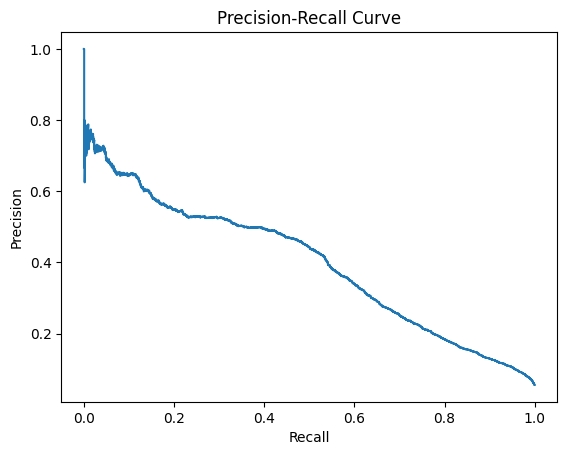

In [55]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [63]:
threshold = 0.8  # increase threshold to increase precision
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Recompute confusion matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print(cm_adjusted)

[[43542  1344]
 [ 1447  1193]]


## XGBoost model

XGBoost training is quite a lot faster than Random Forest

In [ ]:
# Try XGBoost (faster)
from xgboost import XGBClassifier

# Calculate scale_pos_weight for imbalanced dataset
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize the model
xgb_clf = XGBClassifier(
    n_estimators=100,         # Number of trees
    learning_rate=0.1,        # Step size for boosting
    max_depth=3,              # Maximum tree depth
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    eval_metric='logloss'     # Evaluation metric
)

# train the model
xgb_clf.fit(X_train, y_train)

#generate predictions
y_train_pred = xgb_clf.predict(X_train)
y_train_pred_proba = xgb_clf.predict_proba(X_train)[:, 1]
y_pred = xgb_clf.predict(X_test)  # Predicted classes
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]  # Predicted probabilities

# train vs test accuracy

# Recall train
train_recall = recall_score(y_train, y_train_pred)
print(f"Train Recall: {train_recall:.2f}")
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
print(f"Train ROC AUC: {train_roc_auc:.2f}")

# Recall test
recall = recall_score(y_test, y_pred)
print(f"Test Recall: {recall:.2f}")

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC: {roc_auc:.2f}")


Train Recall: 0.79
Train ROC AUC: 0.89
Test Recall: 0.77
Test ROC AUC: 0.89


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[37064  7822]
 [  600  2040]]


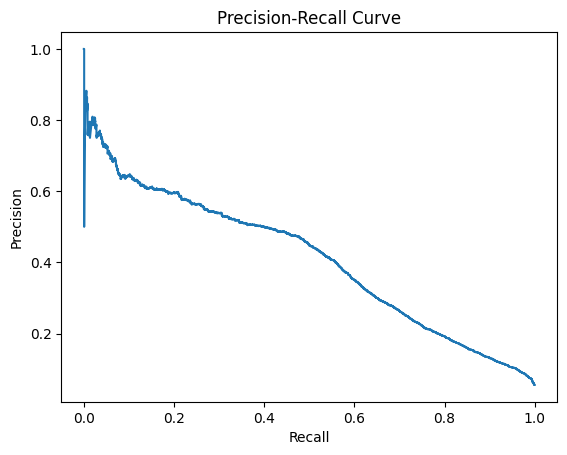

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


XGBoost seems to be working better than non-optimised Random Forest so we can attempt to finetune XGBoost first

In [ ]:

param_grid = {'n_estimators': [50, 100, 200, 500],
              'learning_rate': [0.001, 0.01,0.05, 0.1,0.2, 0.3],
              'max_depth': [3, 5, 7, 10],
              'scale_pos_weight': [scale_pos_weight]}

xgb_clf = XGBClassifier(random_state = 42, eval_metric = 'logloss')

#initialise grid_search
grid_search = GridSearchCV(estimator = xgb_clf,
                           param_grid = param_grid,
                           scoring = 'recall',
                           n_jobs = -1, #use all processors
                           cv = 5,
                           )

# fit the grid search
grid_search.fit(X_train, y_train)

# display best parameters and the best score
print(f'Best params are: {grid_search.best_params_}')
print(f'Best recall score: {grid_search.best_score_}')


Best params are: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50, 'scale_pos_weight': 17.00056812801818}
Best recall score: 0.7861965609717622


Best params are: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50, 'scale_pos_weight': 17.00056812801818}
Best recall score: 0.7861965609717622

n_estimators=100,         # Number of trees
    learning_rate=0.1,        # Step size for boosting
    max_depth=3,              # Maximum tree depth
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    eval_metric='logloss'     # Evaluation metric